In [72]:
# STEP 1: Import all required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# STEP 2: Load the dataset
DATA_PATH = "/content/drive/MyDrive/sales_data_sample.csv"

In [74]:
def load_dataset(path):
    for enc in ['utf-8', 'latin1', 'cp1252']:
        try:
            df = pd.read_csv(path, encoding=enc, low_memory=False)
            print(f"Loaded successfully with encoding: {enc}")
            return df
        except Exception as e:
            print(f"Failed with {enc}: {e}")
    raise Exception("Could not load dataset")
df = load_dataset(DATA_PATH)

Failed with utf-8: 'utf-8' codec can't decode byte 0x84 in position 8: invalid start byte
Loaded successfully with encoding: latin1


In [75]:
# STEP 3: Initial Exploration
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum().head(20))
print("\nPreview of dataset:\n", df.head())

Dataset shape: (2823, 25)

Column names:
 Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

Data types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE     

In [76]:
#Step 4:Data Preprocessing
# Clean column names
# =========================================================
df.columns = df.columns.str.strip()  # remove extra spaces

df.rename(columns={
    'ORDERNUMBER': 'order_id',
    'QUANTITYORDERED': 'quantity',
    'PRICEEACH': 'price_each',
    'SALES': 'sales',
    'ORDERDATE': 'order_date',
    'PRODUCTLINE': 'category',
    'PRODUCTCODE': 'product_code',
    'CUSTOMERNAME': 'customer_name',
    'STATE': 'state',
    'CITY': 'city',
    'POSTALCODE': 'postalcode',
    'ADDRESSLINE1': 'address1',
    'ADDRESSLINE2': 'address2',
    'TERRITORY': 'territory'
}, inplace=True)

print("\nColumns after renaming:\n", df.columns.tolist())

# Convert datatypes
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['price_each'] = pd.to_numeric(df['price_each'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

# Handle missing values
print("\nMissing values before cleaning:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# Drop non-essential address2 column
if 'address2' in df.columns:
    df.drop(columns=['address2'], inplace=True)
    print("\nDropped 'address2' (non-essential column)")

# Fill other missing values
df['state'] = df['state'].fillna('Unknown')
df['territory'] = df['territory'].fillna('Unknown')
df['postalcode'] = df['postalcode'].fillna('00000')

print("\nMissing values after cleaning:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# 6. Drop duplicates and missing essentials
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows")

# FIX: Now check that 'sales' and 'order_date' exist before dropping missing
required_cols = [col for col in ['sales', 'order_date'] if col in df.columns]
if required_cols:
    df.dropna(subset=required_cols, inplace=True)
else:
    print("Required columns missing! Columns available are:", df.columns.tolist())

print("\nCleaning done successfully!")
print("Final dataset shape:", df.shape)
print("\nSample rows:\n", df.head(3))

# Create a "year_month" column
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)

# Group by month and calculate total sales
monthly_sales = df.groupby('year_month')['sales'].sum().reset_index()


Columns after renaming:
 ['order_id', 'quantity', 'price_each', 'ORDERLINENUMBER', 'sales', 'order_date', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'category', 'MSRP', 'product_code', 'customer_name', 'PHONE', 'address1', 'address2', 'city', 'state', 'postalcode', 'COUNTRY', 'territory', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']

Missing values before cleaning:
 address2           2521
state              1486
territory          1074
postalcode           76
sales                 0
quantity              0
price_each            0
ORDERLINENUMBER       0
order_id              0
MONTH_ID              0
dtype: int64

Dropped 'address2' (non-essential column)

Missing values after cleaning:
 order_id           0
quantity           0
price_each         0
ORDERLINENUMBER    0
sales              0
order_date         0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
dtype: int64

Removed 0 duplicate rows

Cleaning done successfully!
Final dataset sha

In [78]:
#Step 5: Save cleaned file
CLEAN_PATH = "/content/drive/MyDrive/cleaned_sales_data.csv"
df.to_csv(CLEAN_PATH, index=False)
print(f"\nCleaned dataset saved to: {CLEAN_PATH}")


Cleaned dataset saved to: /content/drive/MyDrive/cleaned_sales_data.csv


In [80]:
# STEP 6 : Basic KPIs
total_revenue = df['sales'].sum()
total_orders = df['order_id'].nunique()
total_units = df['quantity'].sum()
unique_customers = df['customer_name'].nunique()
aov = total_revenue / total_orders

print("\nKey Metrics:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Units Sold: {total_units}")
print(f"Unique Customers: {unique_customers}")
print(f"Average Order Value (AOV): ${aov:,.2f}")


Key Metrics:
Total Revenue: $10,032,628.85
Total Orders: 307
Total Units Sold: 99067
Unique Customers: 92
Average Order Value (AOV): $32,679.57


Charts will be saved in: /content/drive/MyDrive/ecommerce_outputs


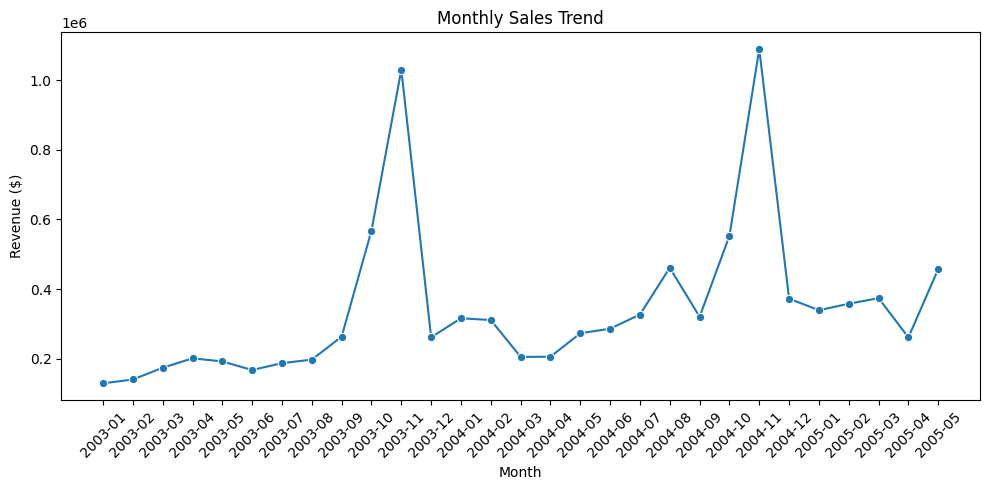

In [81]:
# STEP 7: Monthly Sales Trend
# Define directory for saving all output visuals
OUTPUT_DIR = "/content/drive/MyDrive/ecommerce_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Charts will be saved in: {OUTPUT_DIR}")

plt.figure(figsize=(10,5))
sns.lineplot(x='year_month', y='sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/monthly_sales_trend.png")
plt.show()



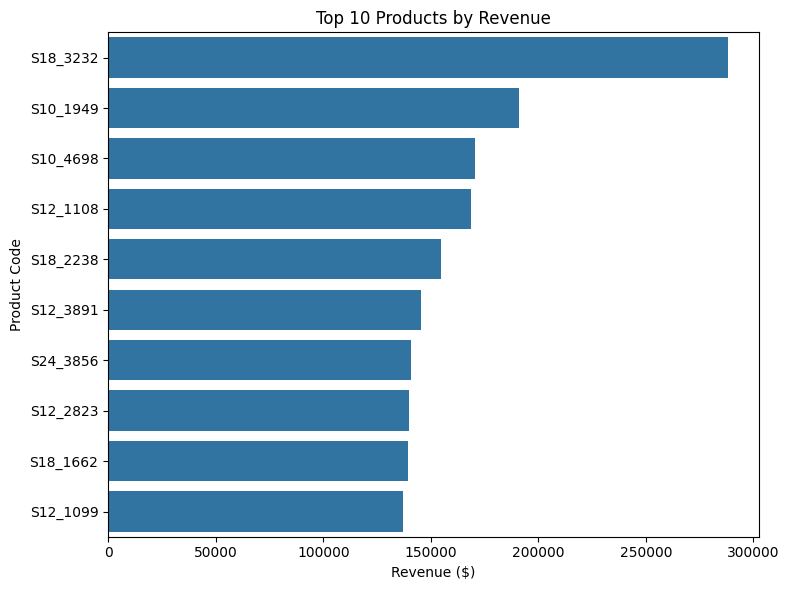

In [82]:
# STEP 8: Top Products by Revenue
product_sales = df.groupby('product_code')['sales'].sum().reset_index()
top_products = product_sales.sort_values('sales', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(y='product_code', x='sales', data=top_products)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Product Code")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/top10_products.png")
plt.show()

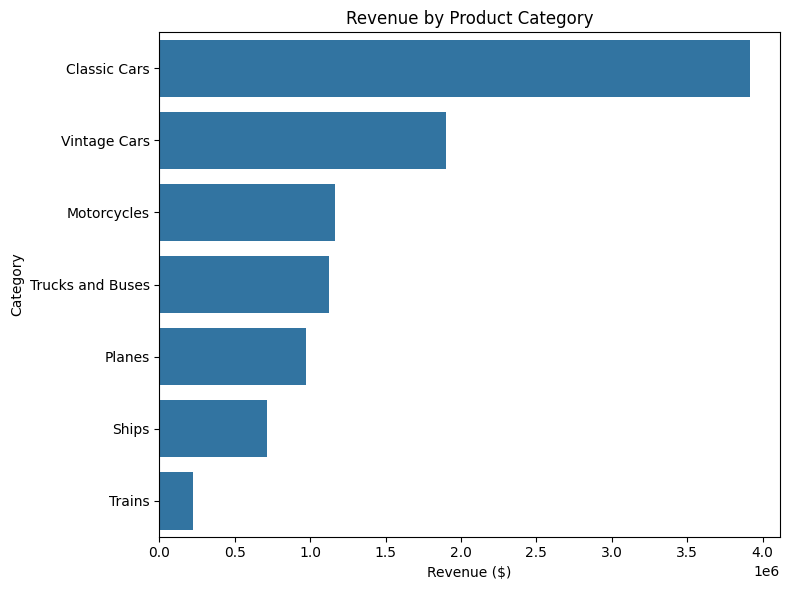

In [83]:
# STEP 9: Revenue by Category
category_sales = df.groupby('category')['sales'].sum().reset_index().sort_values('sales', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='sales', y='category', data=category_sales)
plt.title("Revenue by Product Category")
plt.xlabel("Revenue ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/category_revenue.png")
plt.show()

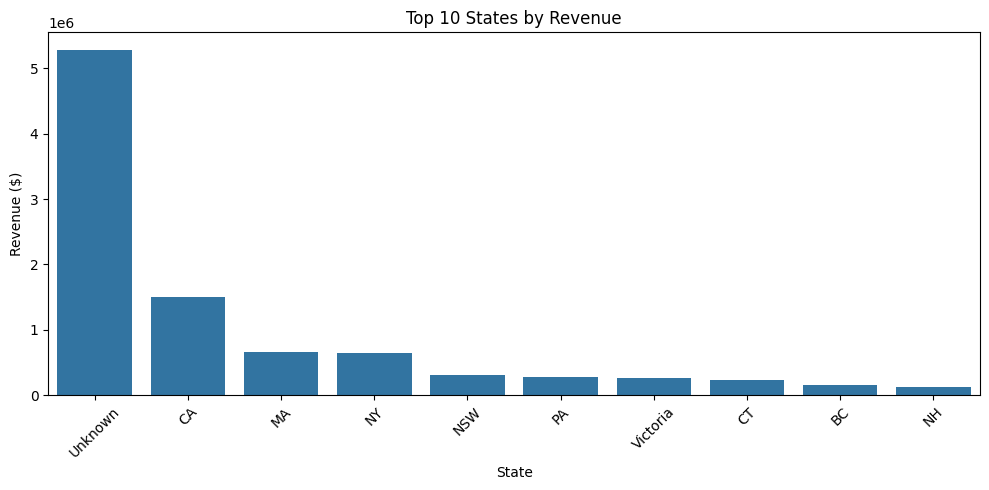

In [84]:
# STEP 10: Regional (State) Sales
if 'state' in df.columns and df['state'].notna().any():
    state_sales = df.groupby('state')['sales'].sum().reset_index().sort_values('sales', ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x='state', y='sales', data=state_sales.head(10))
    plt.title("Top 10 States by Revenue")
    plt.xlabel("State")
    plt.ylabel("Revenue ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_DIR}/top_states.png")
    plt.show()

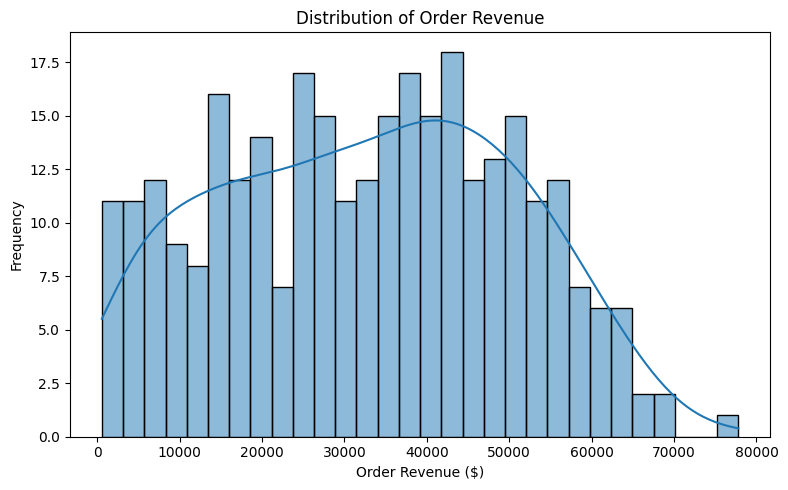

In [85]:
# STEP 11: Order-Level Revenue
order_level = df.groupby('order_id')['sales'].sum().reset_index().rename(columns={'sales': 'order_revenue'})

plt.figure(figsize=(8,5))
sns.histplot(order_level['order_revenue'], bins=30, kde=True)
plt.title("Distribution of Order Revenue")
plt.xlabel("Order Revenue ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/order_revenue_dist.png")
plt.show()
